In [4]:
import mlgrad.funcs as funcs
import mlgrad.cls as cls
import mlgrad.models as models
import mlgrad.loss as loss
import mlgrad.pca as pca

import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

In [18]:
X, Y = load_iris(return_X_y=True)
X2 = X[Y != 0]
Y2 = Y[Y != 0]
Y2[Y2 == 2] = -1
Y2 = Y2.astype("d")

In [19]:
a1 = sum(y*x for y,x in zip(Y2,X2))
a1 /= np.sqrt(a1 @ a1)
print(a1)

[-0.402 -0.126 -0.797 -0.432]


In [20]:
np.sign(sum(y*(x @ a1) for y,x in zip(Y2,X2)))

np.float64(1.0)

In [21]:
np.sum(Y2)

np.float64(0.0)

In [22]:
X2 = pca.project(X2, a1)

In [23]:
a2 = sum(y*x for y,x in zip(Y2,X2))
a2 /= np.sqrt(a2 @ a2)
print(a2)

[ 0.938 -0.252  0.041 -0.236]


In [25]:
X2 = pca.project(X2, a2)

In [26]:
a3 = sum(y*x for y,x in zip(Y2,X2))
a3 /= np.sqrt(a3 @ a3)
print(a3)

[-0.187 -0.768  0.206 -0.576]


In [27]:
np.sign(sum(y*(x @ a3) for y,x in zip(Y2,X2)))

np.float64(1.0)

In [28]:
X2 = pca.project(X2, a3)

In [29]:
a4 = sum(y*x for y,x in zip(Y2,X2))
a4 /= np.sqrt(a4 @ a4)
print(a4)

[ 0.014  0.369  0.410 -0.834]


In [30]:
a4 = np.asarray(lm4.param)
a4 = a4 / np.sqrt(a4[1:] @ a4[1:])
print(a4)

[-0.039  0.807  0.196  0.002  0.557]


In [30]:
np.sign(sum(y*(x @ a4) for y,x in zip(Y2,X2)))

np.float64(1.0)

In [31]:
U1 = X2 @ a1
U2 = X2 @ a2
U3 = X2 @ a3
U4 = X2 @ a4

In [32]:
UU1 = U1 @ U1
UU2 = U2 @ U2
UU3 = U3 @ U3
UU4 = U4 @ U4
print(UU1, UU2, UU3, UU4)

164.20413859302235 9.446832847478012 5.834026987537815e-30 313.6269083079754


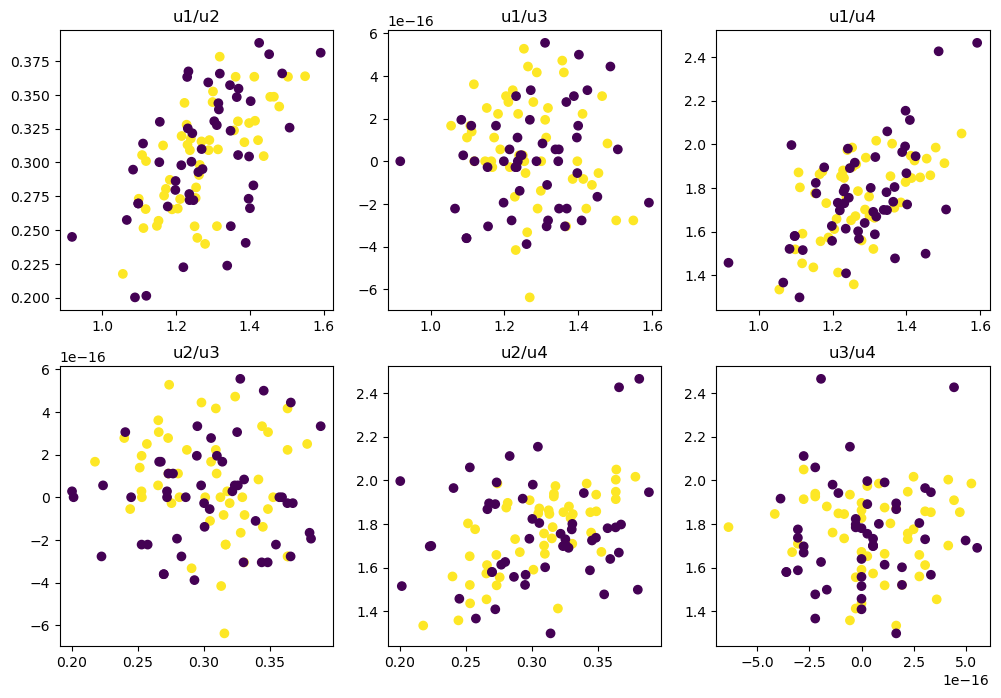

In [33]:
plt.figure(figsize=(12,8))
plt.subplot(2,3,1)
plt.scatter(U1, U2, c=Y2)
plt.title("u1/u2")
plt.subplot(2,3,2)
plt.scatter(U1, U3, c=Y2)
plt.title("u1/u3")
plt.subplot(2,3,3)
plt.scatter(U1, U4, c=Y2)
plt.title("u1/u4")
plt.subplot(2,3,4)
plt.scatter(U2, U3, c=Y2)
plt.title("u2/u3")
plt.subplot(2,3,5)
plt.scatter(U2, U4, c=Y2)
plt.title("u2/u4")
plt.subplot(2,3,6)
plt.scatter(U3, U4, c=Y2)
plt.title("u3/u4")
plt.show()